### Install pandas, numpy, matplotlib, scikit-learn 

In [110]:

%pip install pandas numpy matplotlib scikit-learn seaborn --quiet
print('-' * 60 + "\nAll libaries are installed")

Note: you may need to restart the kernel to use updated packages.
------------------------------------------------------------
All libaries are installed


### Import data and showing it of

In [111]:

import pandas as pd

#Read data csv file
df = pd.read_csv("../data/winequality-red.csv")

print("-" * 60 + "\nShow the first 5 rows:\n")
print(df.head())

print("-" * 60 + "\nShow rows and columns:\n(Rows, Columns)\n")
print(df.shape)

print("-" * 60 + "\nShow all the columns:\n")
df.columns

print("-" * 60 + "\nShow a description of the data:\n")
print(df.describe())

------------------------------------------------------------
Show the first 5 rows:

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

 

### Check for NaN values


In [112]:
check_nans=df.isna().sum()
print(check_nans)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Find and delete duplicates


In [113]:
print("-" * 60 + "\nLooking for duplicates:\n")
dups=df.duplicated()
print(dups)

print("-" * 60 + "\nDeleting duplicates:")
df=df.drop_duplicates()
print("\nDone!")

------------------------------------------------------------
Looking for duplicates:

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool
------------------------------------------------------------
Deleting duplicates:

Done!


### Finding outliers and deleting them


In [114]:
print("-" * 60 + "\nFinding and deleting outliers:\n")
# print(df.describe())
for col in df.columns:
    Q1 = df[f"{col}"].quantile(0.25)
    Q3 = df[f"{col}"].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # print(f"Debug:\ncol: {col} --- IQR: {IQR} --- low: {lower_bound} --- high: {upper_bound}")

    df = df[(df[f"{col}"] >= lower_bound) & (df[f"{col}"] <= upper_bound)]

print("Done!\n" + "-" * 60 + "\nAfter outlier filtering:\n")
print(df.describe())

------------------------------------------------------------
Finding and deleting outliers:

Done!
------------------------------------------------------------
After outlier filtering:

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count     974.000000        974.000000   974.000000      974.000000   
mean        8.140452          0.522726     0.247402        2.189014   
std         1.461878          0.167434     0.181813        0.446676   
min         5.100000          0.120000     0.000000        1.200000   
25%         7.100000          0.390000     0.080000        1.900000   
50%         7.800000          0.520000     0.240000        2.100000   
75%         9.000000          0.635000     0.400000        2.500000   
max        12.300000          1.010000     0.730000        3.650000   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  974.000000           974.000000            974.000000  974.000000   
mean     0.078245     

### Show data with bar chart

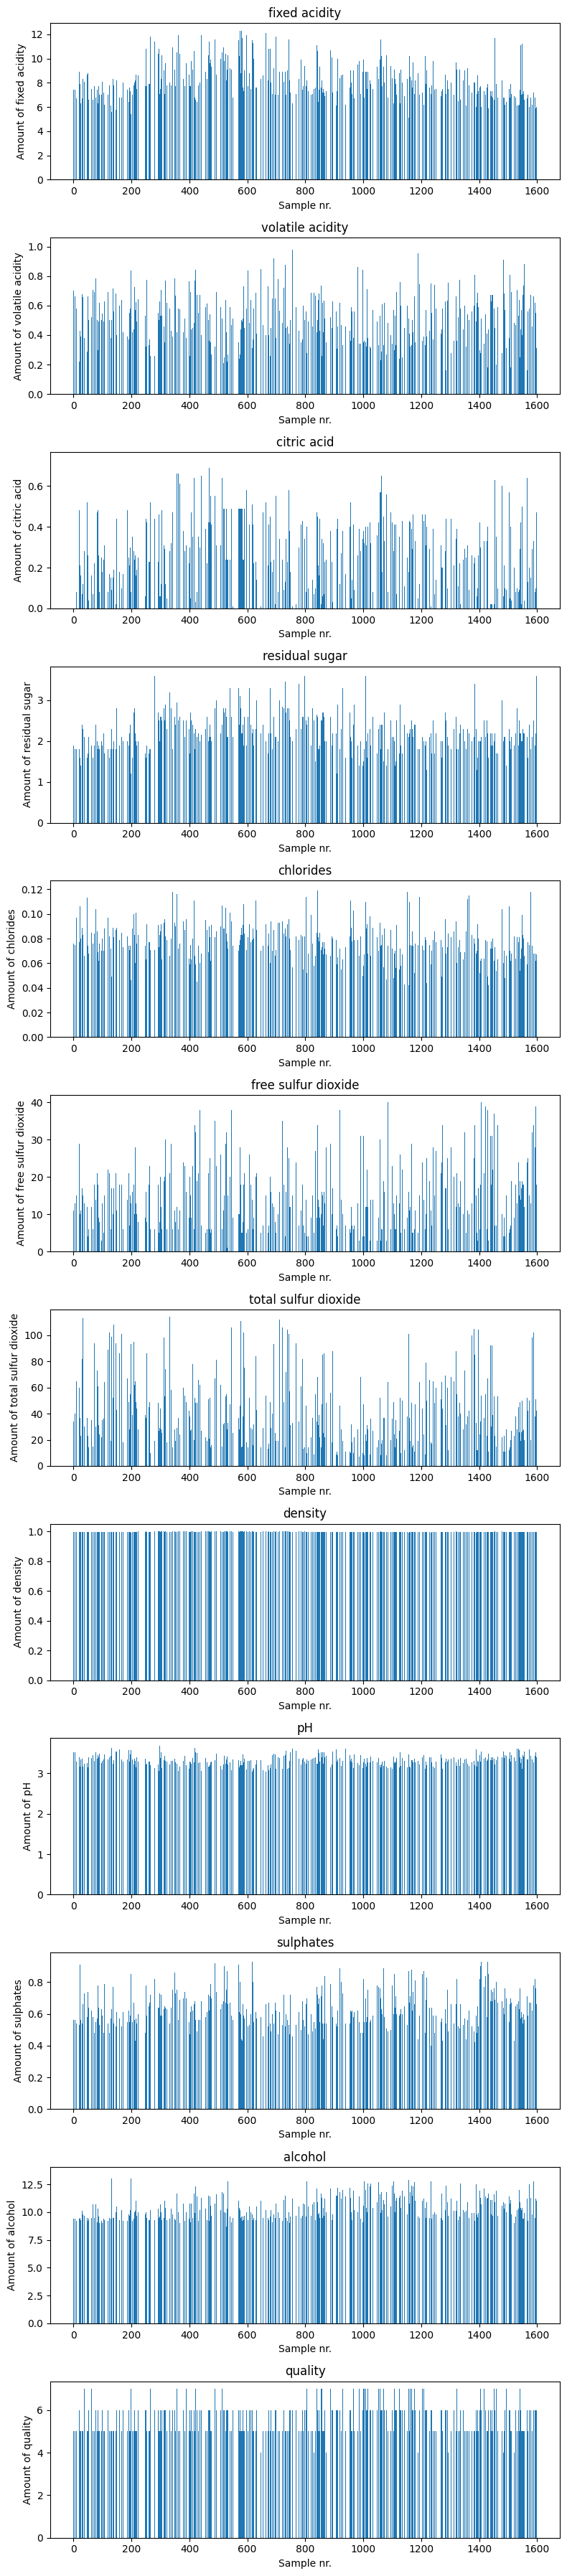

In [115]:
import matplotlib.pyplot as plt

def bar_subplots(dataFrame, columns):
    n = len(columns)
    fig, axes = plt.subplots(n, 1, figsize=(8, 3*n))

    for ax, col in zip(axes, columns):
        ax.bar(dataFrame.index, dataFrame[col])
        ax.set_title(col)
        ax.set_xlabel("Sample nr.")
        ax.set_ylabel(f"Amount of {col}")

    plt.tight_layout()
    plt.show()

bar_subplots(df, df.columns)


### Show data with histogram chart


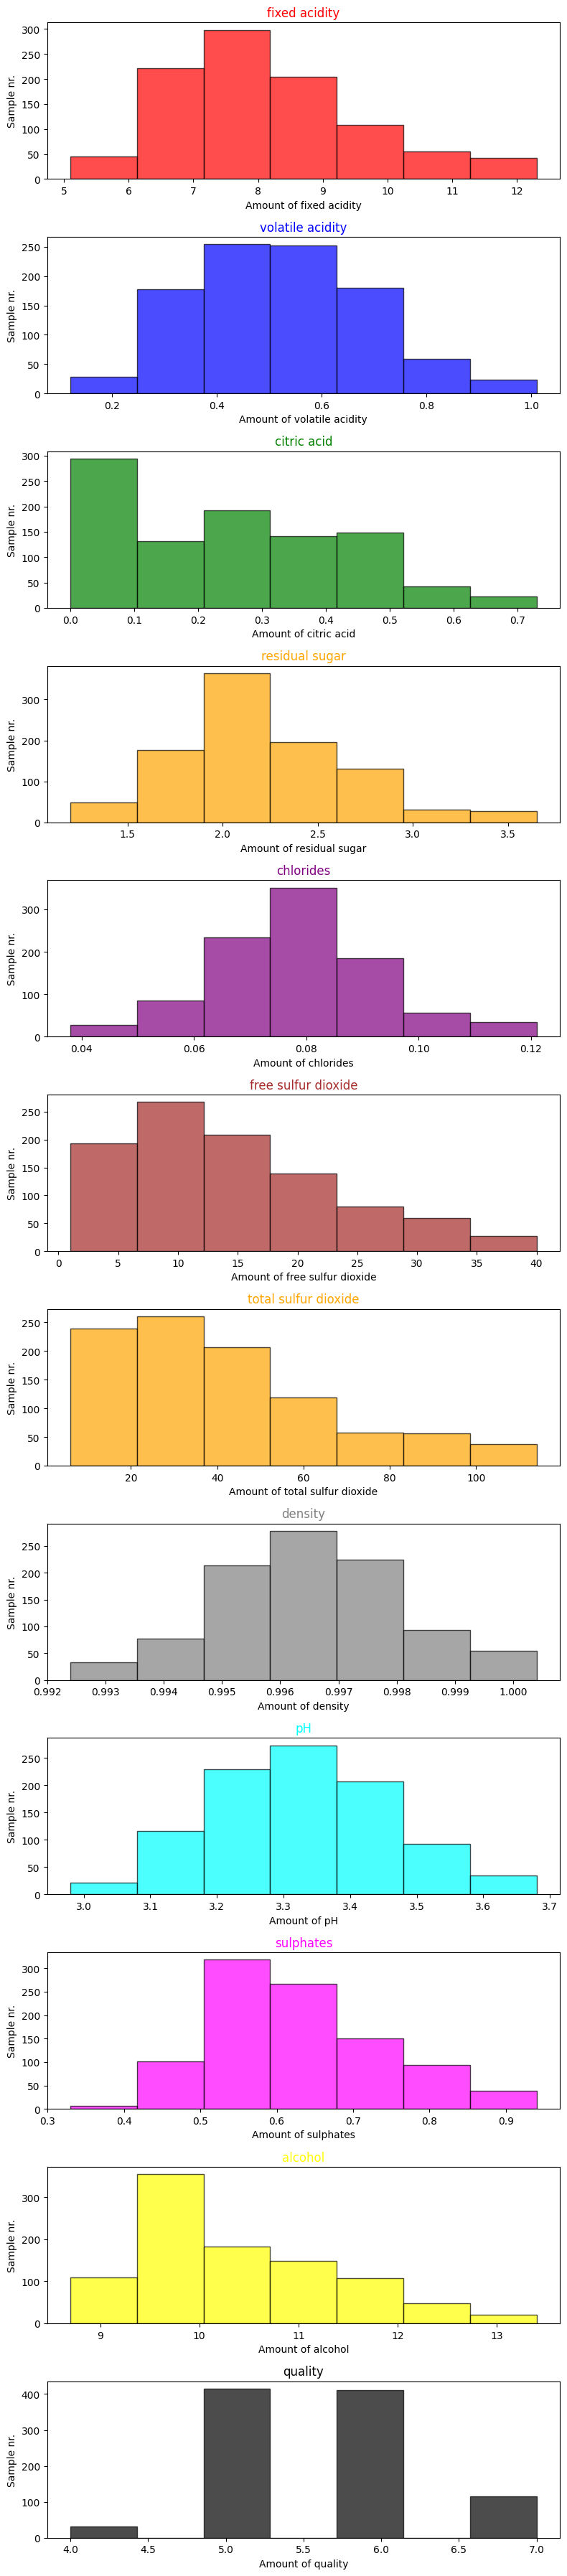

In [116]:
def hist_subplots(df, columns):
    n = len(columns)
    fig, axes = plt.subplots(n, 1, figsize=(8, 3*n))
    colors = ['red','blue','green','orange','purple','brown','orange','gray','cyan','magenta','yellow','black']
    for ax, col,color in zip(axes, columns,colors):
        ax.hist(df[col],bins=7, edgecolor='black', color=color, alpha=0.7)
        ax.set_title(col,color=color)
        ax.set_ylabel("Sample nr.")
        ax.set_xlabel(f"Amount of {col}")
        plt.tight_layout()
    plt.show()

hist_subplots(df, df.columns)


### Good quality wine data graphs

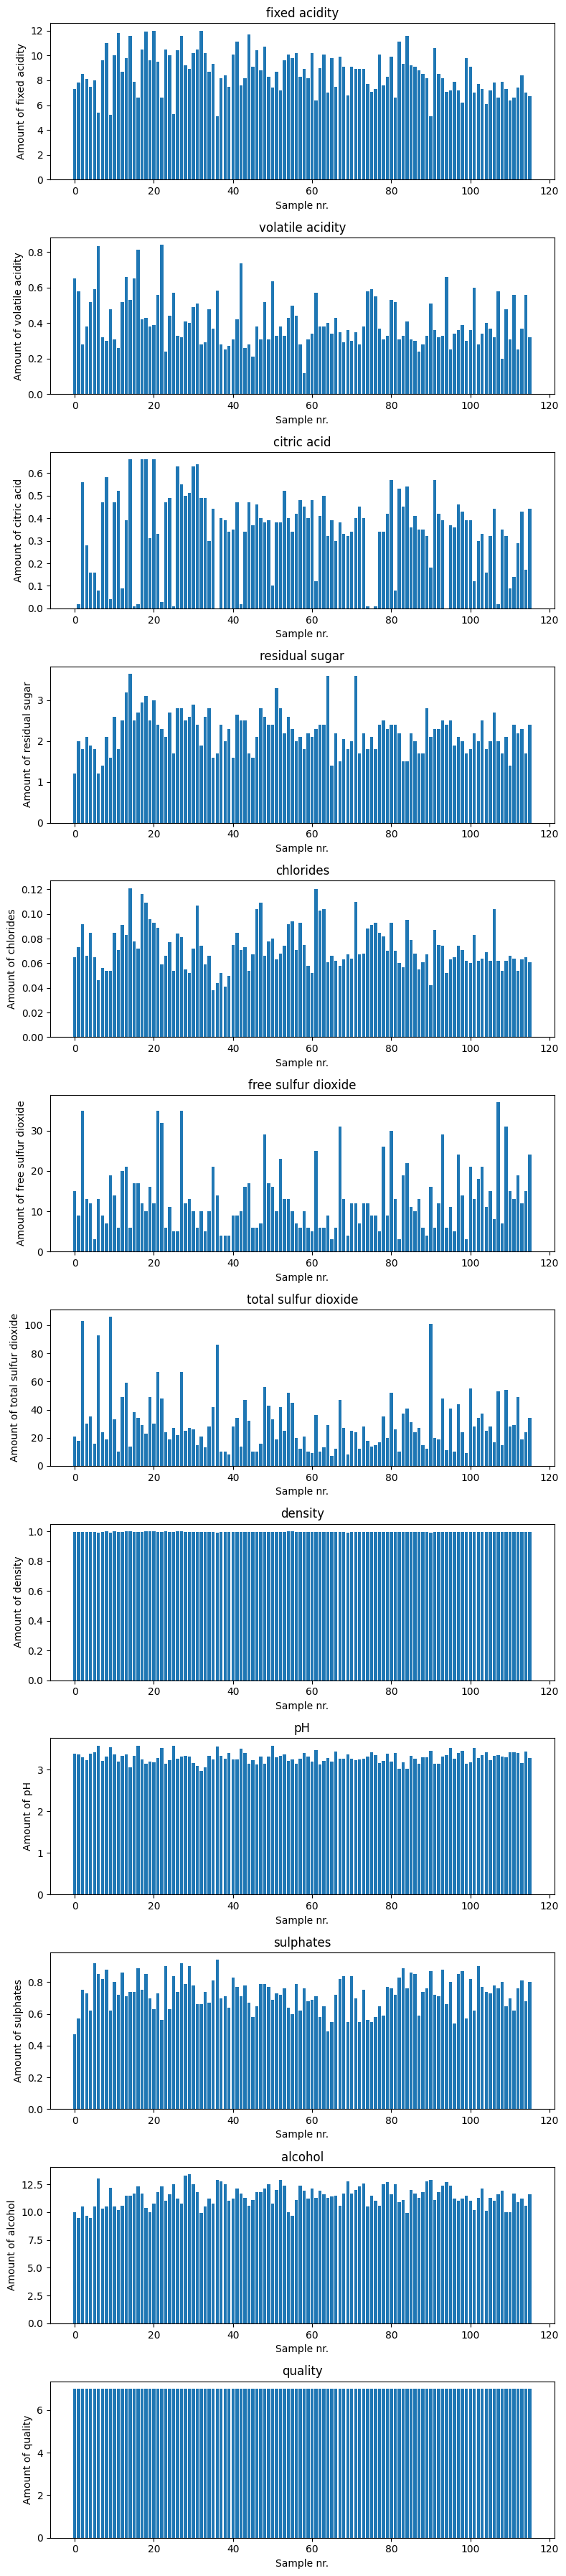

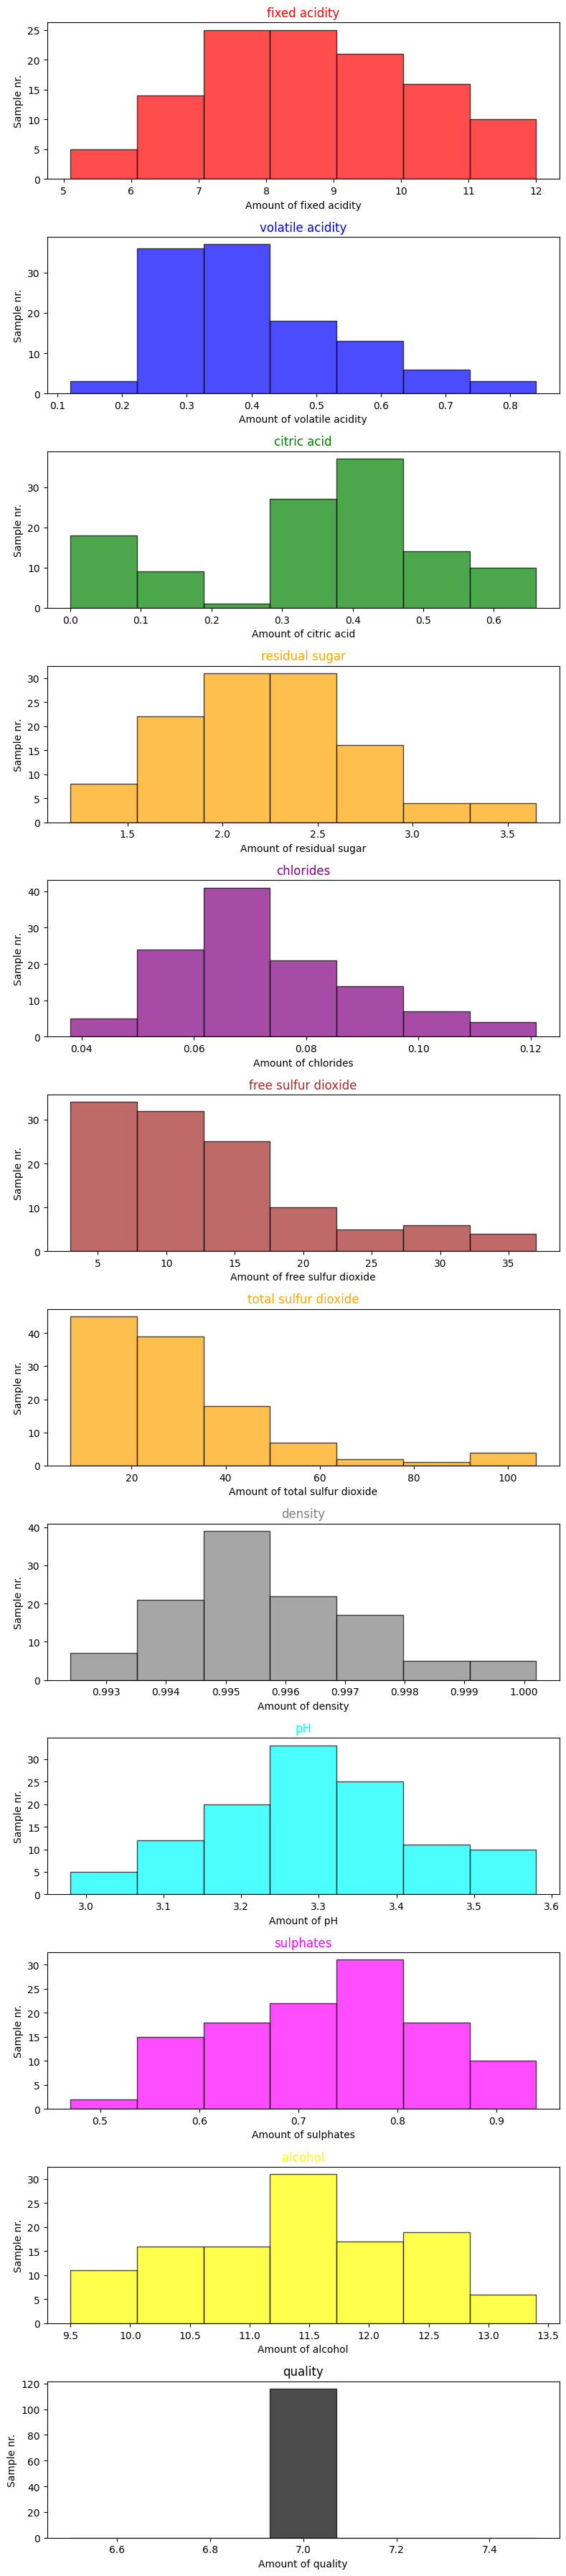

In [117]:
good_quality_wine = df[(df['quality'] >= 6.5)]
good_quality_wine.reset_index(drop=True, inplace=True)

bar_subplots(good_quality_wine, good_quality_wine.columns)
hist_subplots(good_quality_wine, good_quality_wine.columns)



### Machine learning

In [118]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns

print("sklearn libary are now imported!")

sklearn libary are now imported!


### Classifing

In [119]:
# Create a category:
# 1 = high quality
# 0 = low quality
df_cls = df.copy()
good_quality_threshold = 6.5
df_cls["good_quality"] = (df["quality"] >= good_quality_threshold).astype(int)
print("-" * 60 + f"\nClassifing the good quality wine above {good_quality_threshold}, so they are either 1 (high) or 0 (low)\n")
print(df_cls[["quality", "good_quality"]].head(20))

------------------------------------------------------------
Classifing the good quality wine above 6.5, so they are either 1 (high) or 0 (low)

    quality  good_quality
0         5             0
1         5             0
2         5             0
3         6             0
5         5             0
6         5             0
7         7             1
8         7             1
10        5             0
12        5             0
16        7             1
20        6             0
21        5             0
22        5             0
23        5             0
24        6             0
25        5             0
26        5             0
28        5             0
29        6             0


In [120]:
# Get all columns execpt quality
x_clf =df[(df.loc[:,df.columns != 'quality']).columns]
y_clf = df_cls[['good_quality']]

X_train, X_test, Y_train, Y_test = train_test_split(
    x_clf, y_clf, test_size=0.2, random_state=42)

### Logical regression

In [121]:
print("-" * 60 + "\nMaking and traing a ML with the model of Logictic regression")
log_reg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver="liblinear"   
)

# Training the ML on the training data
log_reg.fit(X_train, Y_train)

# Testing the ML against the test data
y_pred_log = log_reg.predict(X_test)

precision = precision_score(y_true=Y_test, y_pred=y_pred_log, average='micro')
recall = recall_score(y_true=Y_test, y_pred=y_pred_log, average='micro')

print("\nResults:\n" + '-' * 20)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_log):.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}\n")

------------------------------------------------------------
Making and traing a ML with the model of Logictic regression

Results:
--------------------
Accuracy: 0.749
Precision: 0.749
Recall: 0.749



/usr/local/lib/python3.14/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


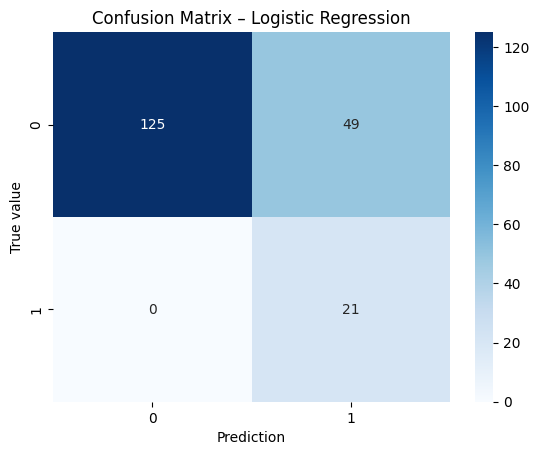

In [122]:
cm_log = confusion_matrix(Y_test, y_pred_log)

sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Prediction")
plt.ylabel("True value")
plt.show()

### Random forest classifier

In [123]:
print("-" * 60 + "\nMaking and traing a ML with the model of Random Forest Classifier")
rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_clf.fit(X_train, Y_train)

y_pred_rf_clf = rf_clf.predict(X_test)

precision = precision_score(y_true=Y_test, y_pred=y_pred_rf_clf,average='micro')
recall = recall_score(y_true=Y_test, y_pred=y_pred_rf_clf, average='micro')

print("\nResults:\n" + "-" * 20)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_rf_clf):.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

------------------------------------------------------------
Making and traing a ML with the model of Random Forest Classifier


/usr/local/lib/python3.14/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Results:
--------------------
Accuracy: 0.923
Precision: 0.923
Recall: 0.923


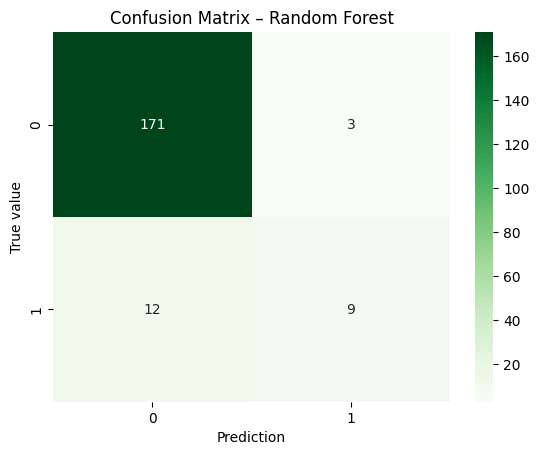

In [124]:
cm_rf = confusion_matrix(Y_test, y_pred_rf_clf)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Prediction")
plt.ylabel("True value")
plt.show()

In [125]:
importances = rf_clf.feature_importances_
features = x_clf.columns

df_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
print(df_importance.sort_values('Importance', ascending=False))

                 Feature  Importance
10               alcohol    0.148634
9              sulphates    0.140547
7                density    0.096843
1       volatile acidity    0.095396
2            citric acid    0.090183
4              chlorides    0.079820
6   total sulfur dioxide    0.079460
0          fixed acidity    0.077374
8                     pH    0.070487
5    free sulfur dioxide    0.062403
3         residual sugar    0.058852


### Recomendation

In [126]:
for col in good_quality_wine.columns:
    meeean = good_quality_wine.head()[f"{col}"].mean()
    stttd = good_quality_wine.head()[f"{col}"].std()
    print(f"{col}: {meeean:.2f} +- {stttd:.2f}")

fixed acidity: 7.84 +- 0.48
volatile acidity: 0.48 +- 0.15
citric acid: 0.20 +- 0.23
residual sugar: 1.80 +- 0.35
chlorides: 0.08 +- 0.01
free sulfur dioxide: 16.80 +- 10.40
total sulfur dioxide: 41.40 +- 35.10
density: 1.00 +- 0.00
pH: 3.33 +- 0.07
sulphates: 0.63 +- 0.12
alcohol: 9.84 +- 0.42
quality: 7.00 +- 0.00
